# More ridge practice - predicting EU sales based on NA sales

In [1]:
import pandas as pd
import numpy as np

sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


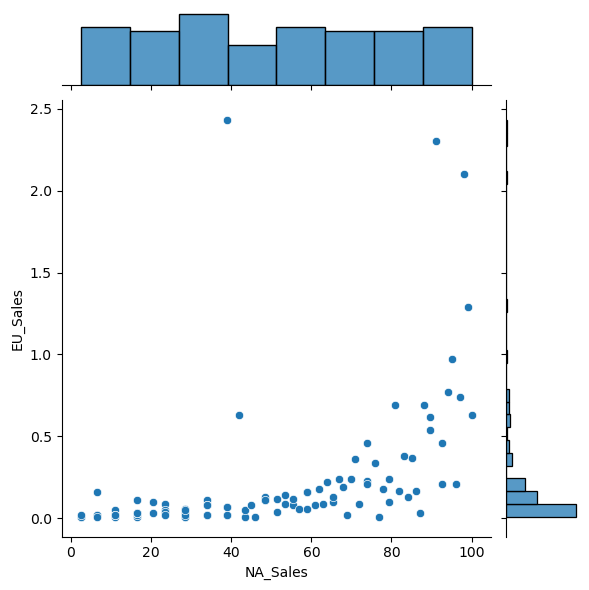

In [3]:
import seaborn as sns
s = sales[(sales.NA_Sales.notnull()) & (sales.EU_Sales.notnull())]
s = sales[(sales.NA_Sales > 0) & (sales.EU_Sales > 0)]
s = s.sample(100, random_state = 0)
s = s.loc[s.NA_Sales.rank().sort_values().index]
sns.jointplot(x=s.NA_Sales.rank(), y=s.EU_Sales)

## basic polynomial for reference

In [4]:
NA_sales_ranks = s.NA_Sales.rank().values[:, np.newaxis]
EU_sales = s.EU_Sales.values[:, np.newaxis]

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

def predict(degree):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = LinearRegression()
    clf.fit(NA_sales_ranks_poly, EU_sales)
    EU_sales_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((EU_sales.flatten(), EU_sales_predictions.flatten())).reshape((100, 2))
    return result

Text(0.5, 1.0, 'Regression with Degree 1')

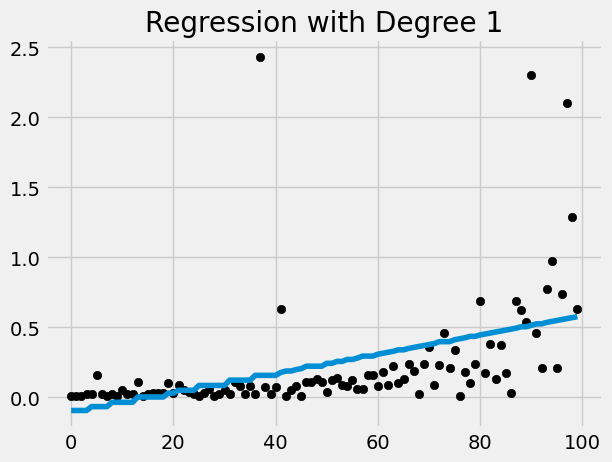

In [6]:
result = predict(1)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("Regression with Degree 1")

Text(0.5, 1.0, 'Regression with Degree 3')

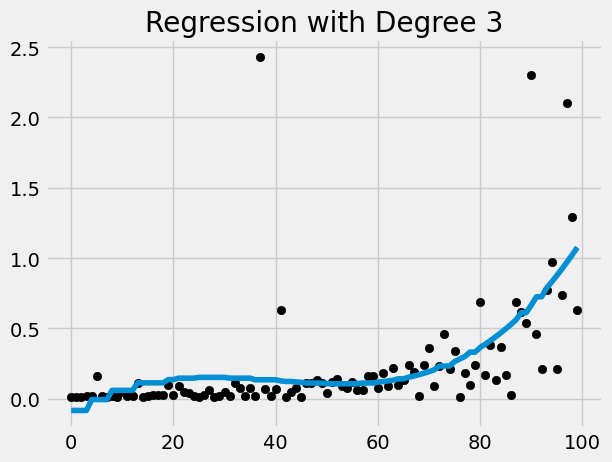

In [7]:
result = predict(3)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("Regression with Degree 3")

Text(0.5, 1.0, 'Regression with Degree 10')

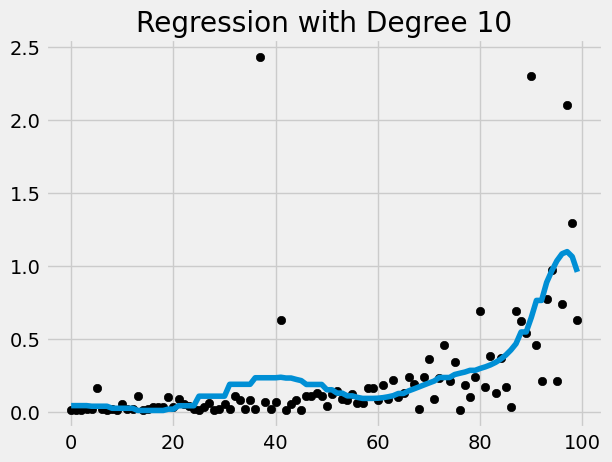

In [11]:
result = predict(10)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("Regression with Degree 10")

## Ridge time

In [12]:
from sklearn.linear_model import Ridge

def get_ridge_model(degree, alpha):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = Ridge(alpha = alpha)
    clf.fit(NA_sales_ranks_poly, EU_sales)
    return clf

def get_ridge_prediction(degree, alpha):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = get_ridge_model(degree, alpha)
    EU_sales_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((EU_sales.flatten(), EU_sales_predictions.flatten())).reshape((100, 2))
    return result

/Users/maximus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.03143e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'degree = 10, alpha = $10^1$')

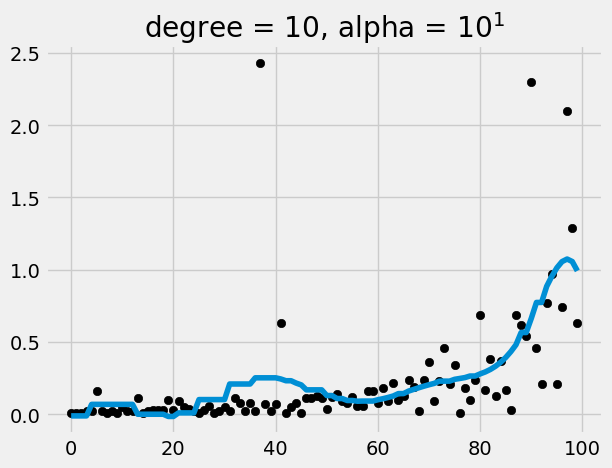

In [13]:
result = get_ridge_prediction(10, 10)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:,0])), result[:, 0], color = 'black')
plt.gca().set_title("degree = 10, alpha = $10^1$")

/Users/maximus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.27306e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'degree = 10, alpha = $10^{19}$')

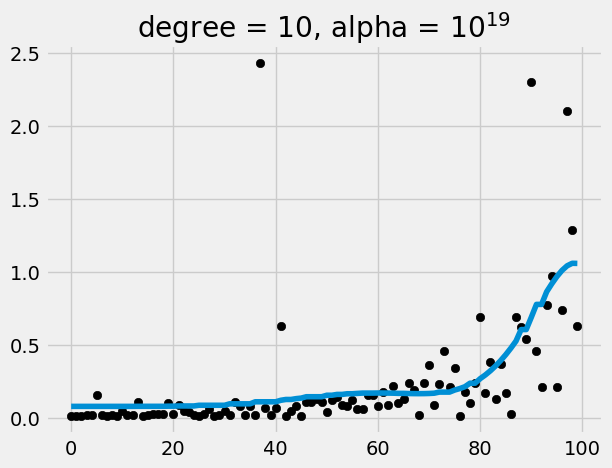

In [15]:
result = get_ridge_prediction(10, 10**19)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:,0])), result[:, 0], color = 'black')
plt.gca().set_title("degree = 10, alpha = $10^{19}$")